## **Classical Random Walk on the Line**


*These simulations are intended to support a comparative analysis between classical and coined quantum walks within the scope of my bachelor's thesis.*

This notebook simulates a **classical random walk** on a 1D line. At each time step, a walker moves either **left (-1)** or **right (+1)**. By default, the walk is symmetric, meaning equal probability for both directions $(p = 0.5)$, but we also compare this with a **biased** walk $(p \ne 0.5)$.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

**1. Symmetric walk**


In [2]:
def classical_random_walk(n_steps=100, n_walks=100000, p_right=0.5):
    final_positions = []

    for _ in range(n_walks):
        steps = np.random.choice([-1, 1], size=n_steps, p=[1 - p_right, p_right])
        position = np.sum(steps)
        final_positions.append(position)

    counts = Counter(final_positions)
    positions = np.array(sorted(counts.keys()))
    probabilities = np.array([counts[pos] / n_walks for pos in positions])
    
    return positions, probabilities

Parameters including number of walks and number of steps.


In [18]:
n_walks = 100000
n_steps_list = [50, 100, 200, 465]

Plotting the probability distribution of final positions.

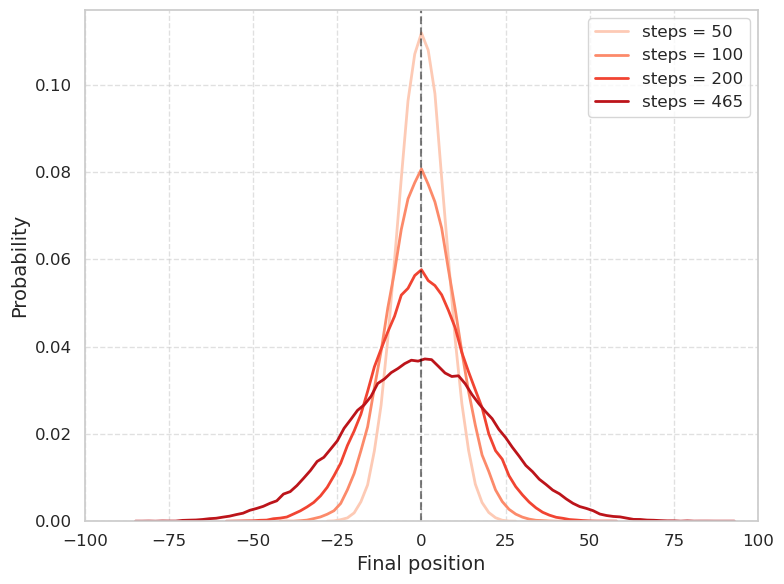

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

colors = sns.color_palette("Reds", n_colors=len(n_steps_list))

for i, n_steps in enumerate(n_steps_list):
    positions, probabilities = classical_random_walk(n_steps=n_steps, n_walks=n_walks, p_right=0.5)
    plt.plot(positions, probabilities, label=f'steps = {n_steps}', linewidth=2, color=colors[i])

plt.xlabel('Final position', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(probabilities) * 3.15)
plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('random_walk_symmetric.png', dpi=300, bbox_inches='tight')
plt.show()

**2. Biased walk**


The biased random walk is configured with a rightward movement probability $p = 0.75$, meaning the walker is more likely to move to the right than left. The biased random walk is configured with a rightward movement probability $p = 0.35$, meaning the walker is more likely to move to the left than right.

In [41]:
n_steps = 100  
positions_right, probabilities_right = classical_random_walk(n_steps=n_steps, n_walks=n_walks, p_right=0.75)
positions_left, probabilities_left = classical_random_walk(n_steps=n_steps, n_walks=n_walks, p_right=0.35)

Plotting the probability distribution of final positions.

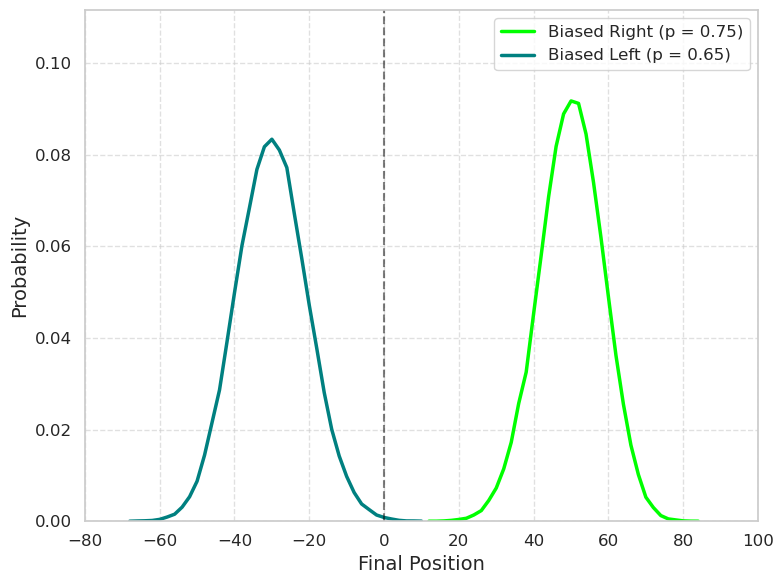

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(positions_right, probabilities_right, color='lime', linewidth=2.5, label='Biased Right (p = 0.75)')
plt.plot(positions_left, probabilities_left, color='teal', linewidth=2.5, label='Biased Left (p = 0.65)')

plt.xlabel('Final Position', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(probabilities) * 3)
plt.xlim(-80,100)
plt.tight_layout()
plt.savefig('random_walk_bias.png', dpi=300, bbox_inches='tight')
plt.show()